               Bharat Intern
               Data Science Intern
               Task 1- Stock Price Prediction Using LSTM Model
               
### Importing libraries and data

In [1]:
            import numpy as np
            import tensorflow as tf
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            %matplotlib inline
            import warnings
            warnings.filterwarnings('ignore')
            from sklearn.preprocessing import MinMaxScaler
            from sklearn import preprocessing
            from keras.models import Sequential
            from keras.layers import Dense, Dropout, LSTM, Bidirectional
            from keras.layers import Dense, Dropout, Activation
            from keras.optimizers import SGD
        
            

In [2]:
df=pd.read_csv('NFLX.csv')

### Reading Data

In [7]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [6]:
  df.shape

(1009, 7)

In [7]:
  df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
 df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


In [12]:
 df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
df.isnull().sum().sum()

0

#### there is no null values in the dataset 

In [13]:
  df=df[['Date', 'Close','Open']]
  df


,Date,Close,Open
0,2018-02-05,254.259995,262.000000
1,2018-02-06,265.720001,247.699997
2,2018-02-07,264.559998,266.579987
3,2018-02-08,250.100006,267.079987
4,2018-02-09,249.470001,253.850006
...,...,...,...
1004,2022-01-31,427.140015,401.970001
1005,2022-02-01,457.130005,432.959991
1006,2022-02-02,429.480011,448.250000
1007,2022-02-03,405.600006,421.440002


In [14]:
# converting object dtype of date column to datetime dtype
df['Date'] = pd.to_datetime(df['Date'])
df['Date']


0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [15]:
df.set_index('Date',drop=True,inplace=True)

In [16]:
df.head(10)

,Close,Open
Date,,
2018-02-05,254.259995,262.000000
2018-02-06,265.720001,247.699997
2018-02-07,264.559998,266.579987
2018-02-08,250.100006,267.079987
2018-02-09,249.470001,253.850006
2018-02-12,257.950012,252.139999
2018-02-13,258.269989,257.290009
2018-02-14,266.000000,260.470001
2018-02-15,280.269989,270.029999


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1009 non-null   float64
 1   Open    1009 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [18]:
df.dtypes

Close    float64
Open     float64
dtype: object

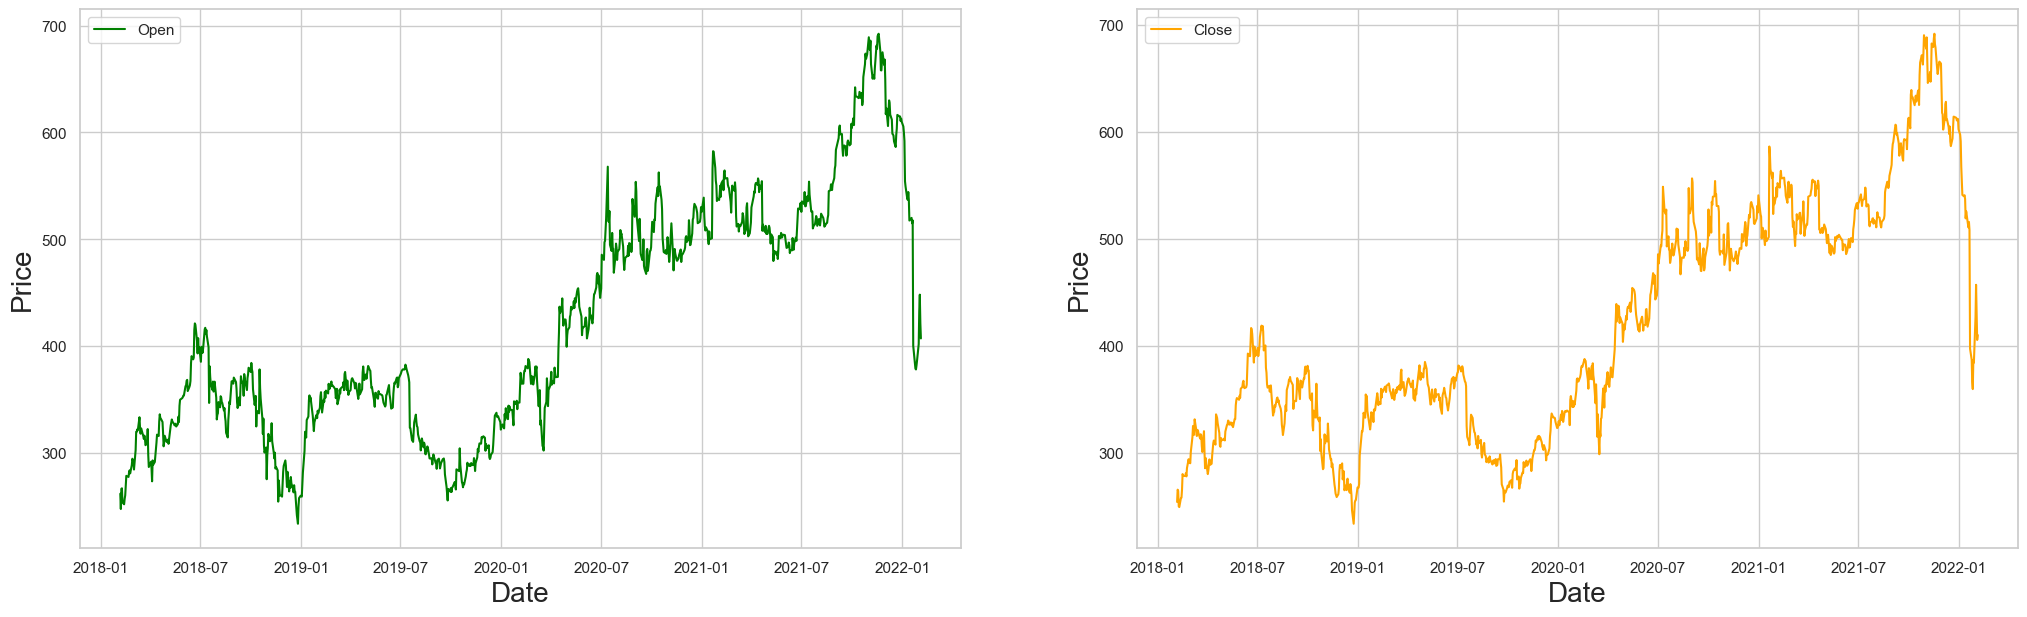

In [19]:
  sns.set(style='whitegrid')
  fig, ax = plt.subplots(1, 2, figsize=(25, 7))

# Plot 'open' column
  sns.lineplot(data=df, x=df.index, y='Open', ax=ax[0], label='Open', color='green')
  ax[0].set_xlabel('Date', size=20)
  ax[0].set_ylabel('Price', size=20)
  ax[0].legend()

# Plot 'close' column
  sns.lineplot(data=df, x=df.index, y='Close', ax=ax[1], label='Close', color='orange')
  ax[1].set_xlabel('Date', size=20)
  ax[1].set_ylabel('Price', size=20)
  ax[1].legend()

  plt.show()


###  Data Pre-Processing

In [20]:
  print(df.dtypes)



Close    float64
Open     float64
dtype: object


In [21]:
# normalizing all the values of all columns using MinMaxScaler
scaler = MinMaxScaler()

In [22]:
df[df.columns] = scaler.fit_transform(df)
df


,Close,Open
Date,,
2018-02-05,0.044516,0.061253
2018-02-06,0.069548,0.030059
2018-02-07,0.067015,0.071243
2018-02-08,0.035430,0.072334
2018-02-09,0.034053,0.043474
...,...,...
2022-01-31,0.422140,0.366577
2022-02-01,0.487648,0.434178
2022-02-02,0.427251,0.467531


In [23]:
training_size= int(len(df) * 0.70) #use 75 % data for training and the rest 30% for testing
training_size


706

In [24]:
train_data = df[:training_size]
test_data  = df[training_size:]
train_data.shape, test_data.shape

((706, 2), (303, 2))

In [25]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []
  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [29]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((656, 50, 2), (656, 2), (253, 50, 2), (253, 2))

###  Implementation of our LSTM model:


In [30]:
# imported Sequential from keras.models  
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/100
21/21 [==============================] - 12s 138ms/step - loss: 0.0196 - mean_absolute_error: 0.1016 - val_loss: 0.0381 - val_mean_absolute_error: 0.1757
Epoch 2/100
21/21 [==============================] - 1s 61ms/step - loss: 0.0038 - mean_absolute_error: 0.0485 - val_loss: 0.0095 - val_mean_absolute_error: 0.0759
Epoch 3/100
21/21 [==============================] - 1s 61ms/step - loss: 0.0025 - mean_absolute_error: 0.0377 - val_loss: 0.0061 - val_mean_absolute_error: 0.0544
Epoch 4/100
21/21 [==============================] - 1s 61ms/step - loss: 0.0023 - mean_absolute_error: 0.0372 - val_loss: 0.0056 - val_mean_absolute_error: 0.0512
Epoch 5/100
21/21 [==============================] - 1s 61ms/step - loss: 0.0023 - mean_absolute_error: 0.0368 - val_loss: 0.0052 - val_mean_absolute_error: 0.0526
Epoch 6/100
21/21 [==============================] - 1s 61ms/step - loss: 0.0021 - mean_absolute_error: 0.0347 - val_loss: 0.0052 - val_mean_absolute_error: 0.0528
Epoch 7/100
21

In [37]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:10]

8/8 [==============================] - 0s 21ms/step


array([[0.6887616 , 0.69849706],
       [0.6951347 , 0.7047375 ],
       [0.6905406 , 0.6996722 ],
       [0.7008633 , 0.71062684],
       [0.7196427 , 0.7301179 ],
       [0.7094957 , 0.7190652 ],
       [0.6997996 , 0.7091692 ],
       [0.7011873 , 0.71098024],
       [0.688094  , 0.69724977],
       [0.6824319 , 0.69160485]], dtype=float32)

In [38]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = scaler.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[549.20197, 554.132  ],
       [552.1196 , 556.99274],
       [550.01636, 554.6707 ],
       [554.74225, 559.6926 ],
       [563.3396 , 568.6279 ]], dtype=float32)

### VISUALIZING ACTUAL VS PREDICTED DATA


In [41]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-253:].copy(), pd.DataFrame(test_inverse_predicted[-253:], columns=['open_predicted', 'close_predicted'], index=df.iloc[-253:].index)], axis=1)


In [42]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = scaler.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Close,Open,open_predicted,close_predicted
Date,,,,
2021-02-05,551.259141,551.789494,549.201965,554.132019
2021-02-08,548.385259,554.525778,552.119629,556.992737
2021-02-09,559.550383,545.537950,550.016357,554.670715
2021-02-10,564.076524,562.015635,554.742249,559.692627
2021-02-11,558.068399,563.953014,563.339600,568.627930


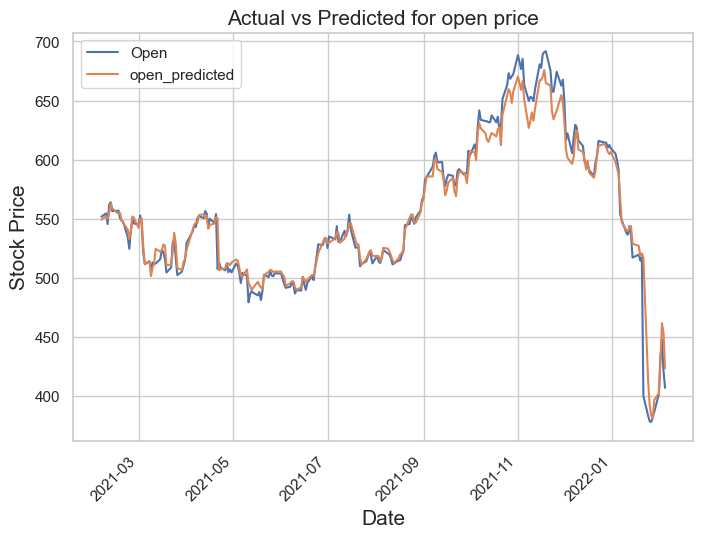

In [43]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(8,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

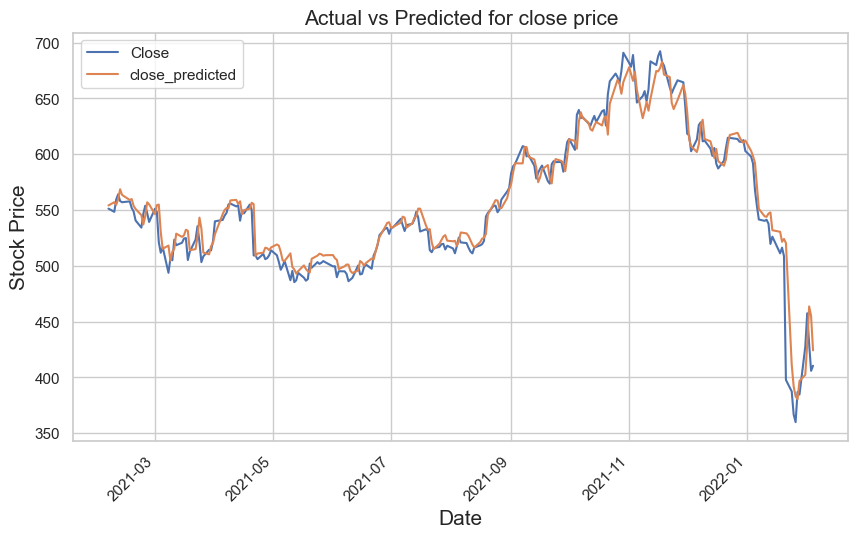

In [44]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()



### PREDICTING UPCOMING 15 DAYS


In [47]:
# Creating a dataframe and adding 15 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-21']

,Close,Open,open_predicted,close_predicted
2021-06-09,486.191163,494.107598,497.166473,501.091858
2021-06-10,487.653131,486.787525,491.855225,495.457153
2021-06-11,489.155162,489.613684,489.973511,493.588257
2021-06-14,500.290247,489.294110,492.060303,495.830139
2021-06-15,492.289406,500.828508,500.204498,504.326813
2021-06-16,492.800107,494.606922,499.075012,502.933868
2021-06-17,498.738129,489.863346,496.441986,500.196869
2021-06-18,501.171413,496.005023,498.508026,502.465240
2021-06-21,497.396319,501.237957,502.424408,506.561462


In [48]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [49]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 35ms/step


In [50]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = scaler.inverse_transform(upcoming_prediction[['open','close']])

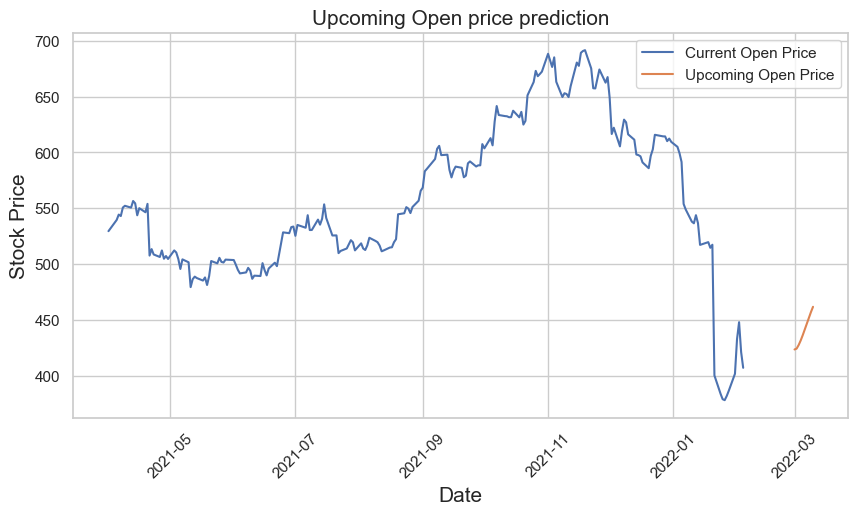

In [52]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()


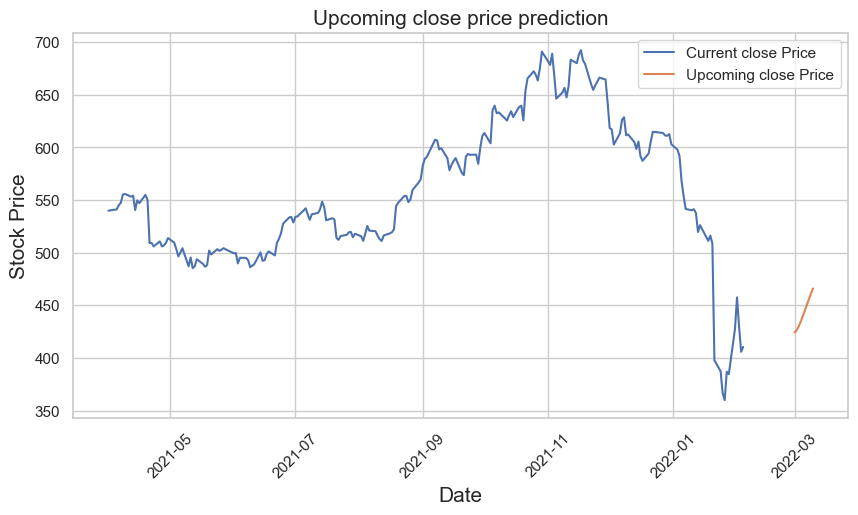

In [60]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price',)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()